In [3]:
# importing (and installing) libraries that extend basic python and
# add in mapping capabilities
#!pip install folium
import folium

In [4]:
# defining two decimal variables (double-precision floating point decimal) to store map coordinates
#  such as latitude and longitude
lat = 43.7031000
lon = -72.28854


In [5]:
# the 'folium' library makes mapping in Python very easy!
map = folium.Map(location=[lat, lon], zoom_start=15)

# un-comment to show the map
#map

In [6]:
# adding a marker and a popup box is very easy too!
marker = folium.Marker(location=[lat, lon], popup='An interesting point')
marker.add_to(map)
# un-comment next line to show the map
map

In [7]:
# importing a few more libraries
# plotting
import matplotlib.pyplot as plt
# data wrangling
import pandas as pd
# geospatial data wrangling & geometric analysis
import geopandas as gpd
# working with shapes and spatial objects
import shapely


In [9]:
# reading in data from the web.  this is a CSV file with coordinates in it.
point_csv = pd.read_csv('https://rcweb.dartmouth.edu/homes/f002d69/workshops/data/bear-sightings.csv')
point_csv.head(4)


,bear.id,longitude,latitude
0,7,-148.956023,62.658220
1,57,-152.622839,58.350642
2,69,-144.937397,62.382270
3,75,-152.848486,59.901222


In [10]:
# good practice also to look at the last few rows
point_csv.tail(3)

,bear.id,longitude,latitude
491,9981,-152.059917,61.656170
492,9987,-146.847410,61.882674
493,9996,-160.670380,67.570788


In [11]:
# isna() is a useful function to look for any missing values
# point_csv.isna().sum().sum() # all/ total nan's
point_csv.isna().sum()

bear.id      0
longitude    0
latitude     0
dtype: int64

In [12]:
#file_name = list(uploaded.keys())[0]
file_name = 'https://rcweb.dartmouth.edu/homes/f002d69/workshops/data/nationalparks_ak.zip'
polygons = gpd.read_file(file_name)
polygons.head(3)

,Unit_Code,Unit_Name,Unit_Type,NPS_Region,ScaleRank,FeatureCla,Note,Name,geometry
0,YUCH,Yukon-Charley Rivers N PRES,National Preserve,Alaska,4,National Park Service,None,Yukon-Charley Rivers N PRES,"POLYGON ((-142.34907 64.99516, -142.34907 64.9..."
1,NOAT,Noatak N PRES,National Preserve,Alaska,4,National Park Service,None,Noatak N PRES,"POLYGON ((-155.65266 68.02284, -155.65266 68.0..."
2,KOVA,Kobuk Valley NP,National Park,Alaska,4,National Park Service,None,Kobuk Valley,"POLYGON ((-157.85947 67.42408, -157.85947 67.4..."


In [13]:
# look for any significant NA's in this dataset
polygons.isna().sum()

Unit_Code      0
Unit_Name      0
Unit_Type      0
NPS_Region     0
ScaleRank      0
FeatureCla     0
Note          13
Name           0
geometry       0
dtype: int64

In [14]:
# convert the CSV, which has latitude and longitude values in it, to a geopandas spatial object
points = gpd.GeoDataFrame(point_csv, geometry=gpd.points_from_xy(point_csv.longitude, point_csv.latitude))
points.head(3)
# note the 'geometry' field

,bear.id,longitude,latitude,geometry
0,7,-148.956023,62.658220,POINT (-148.95602 62.65822)
1,57,-152.622839,58.350642,POINT (-152.62284 58.35064)
2,69,-144.937397,62.382270,POINT (-144.9374 62.38227)


In [15]:
# set the coodinate reference system of the points to epsg 4326
points.crs='EPSG:4326'

In [16]:
points = points.to_crs(polygons.crs)

In [17]:
# do the spatial join! this line of code does a spatial overlay for points within polygons
points_in_polygons = gpd.sjoin(points, polygons, predicate='within')
points_in_polygons.head(3)

,bear.id,longitude,latitude,geometry,index_right,Unit_Code,Unit_Name,Unit_Type,NPS_Region,ScaleRank,FeatureCla,Note,Name
2,69,-144.937397,62.382270,POINT (-144.9374 62.38227),9,WRST,Wrangell-St. Elias NP & PRES,National Park and Preserve,Alaska,4,National Park Service,None,Wrangell-St. Elias
3,75,-152.848486,59.901222,POINT (-152.84849 59.90122),5,LACL,Lake Clark NP & PRES,National Park and Preserve,Alaska,4,National Park Service,None,Lake Clark
4,104,-143.294816,61.073108,POINT (-143.29482 61.07311),9,WRST,Wrangell-St. Elias NP & PRES,National Park and Preserve,Alaska,4,National Park Service,None,Wrangell-St. Elias


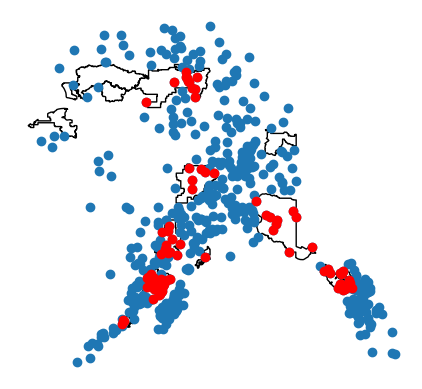

In [18]:
polygons.plot(facecolor='none')
points.plot(ax=plt.gca())
points_in_polygons.plot(color='red', ax=plt.gca())
plt.axis("off")
plt.show()

In [19]:
# to export the results to an external CSV:

# if running in local instance of python, like VS Code, Export to CSV
points_in_polygons.to_csv('bears-in-parks.csv', index=False)

# If running in Colab / Jupyter you can download the file with:
#from google.colab import files
#files.download('bears-in-parks.csv')

In [20]:
# let's make a leaflet map in Google Colab
# center the map (this time a folium / leaflet map)
mid_lat = polygons.geometry.centroid.y.mean()
mid_lon = polygons.geometry.centroid.x.mean()
# create the map / initialize the map
map_folium = folium.Map(location=[mid_lat, mid_lon], zoom_start=5)
# to clear the map, re-run this cell to reinitialize the map

# To clear the map, re-initialize it
#my_map = folium.Map(location=[40.7128, -74.0060], zoom_start=9)
#my_map #Display the cleared map

/var/folders/sg/cy13dc_j0vzg_r3xrvskyw500000gq/T/ipykernel_18520/4272188490.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mid_lat = polygons.geometry.centroid.y.mean()
/var/folders/sg/cy13dc_j0vzg_r3xrvskyw500000gq/T/ipykernel_18520/4272188490.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mid_lon = polygons.geometry.centroid.x.mean()


In [21]:
# loop over the polygons, and place them in the map
# to see the popup box for a polygon, click on the polygon, it should display
# the name of the park in the popup window
for idx, row in polygons.iterrows():
    # Ensure geometry is a Polygon or MultiPolygon
    geom = row.geometry
    if geom.geom_type == 'Polygon':
        coords = [(y, x) for x, y in geom.exterior.coords]
        folium.Polygon(
            locations=coords,
            fill=True,
            popup=f"Polygon: {row['Unit_Name']}"
        ).add_to(map_folium)
    elif geom.geom_type == 'MultiPolygon':
        # If multipolygon, add each polygon separately
        for poly in geom.geoms:
            coords = [(y, x) for x, y in poly.exterior.coords]
            folium.Polygon(
                locations=coords,
                fill=True,
                popup=f"Polygon: {row['Unit_Name']}"
            ).add_to(map_folium)

# Display the folium map (outside the loop)
map_folium


In [22]:
# plot all of the bear sightings...
# Iterate over the rows of your GeoDataFrame
for index, row in points.iterrows():
    # Get the coordinates of the point
    lat = row.geometry.y
    lon = row.geometry.x

    # Add a marker to the map
    folium.Marker([lat, lon], popup=row['bear.id']).add_to(map_folium) # Assuming you have a 'name' column for popups

map_folium

In [23]:
# next, plot the bears inside polygons, using red icons ,
for index, row in points_in_polygons.iterrows():
    # Get the coordinates of the point
    lat = row.geometry.y
    lon = row.geometry.x

    # Add a marker to the map
    folium.Marker([lat, lon], icon=folium.Icon(color="red"), popup=row['bear.id'], color='red').add_to(map_folium) # Assuming you have a 'name' column for popups
#             icon=folium.Icon(color="red"),

map_folium

In [24]:
# Save the map to an HTML file
map_folium.save("points-in-polygons.html")

In [25]:

# find the approximate center of each polygon,
# and then download a csv file of the polygon centroids
# Create a list to store centroid info
centroid_list = []

for idx, row in polygons.iterrows():
    centroid = row.geometry.centroid
    centroid_list.append({
        'index': idx,
        'Unit_Name': row.get('Unit_Name', f'Polygon_{idx}'),  # replace 'Unit_Name' with your column name, or use a default string
        'centroid_lon': centroid.x,
        'centroid_lat': centroid.y
    })

# Convert to pandas DataFrame
centroid_df = pd.DataFrame(centroid_list)

# Show first five rows
print(centroid_df.head())

# if running in local instance of python, like VS Code, Export to CSV
centroid_df.to_csv('polygon_centroids.csv', index=False)

# If running in Colab / Jupyter you can download the file with:
#from google.colab import files
#files.download('polygon_centroids.csv')

   index                    Unit_Name  centroid_lon  centroid_lat
0      0  Yukon-Charley Rivers N PRES   -142.796076     65.087789
1      1                Noatak N PRES   -159.825965     68.004119
2      2              Kobuk Valley NP   -159.197710     67.353186
3      3          Aniakchak NM & PRES   -157.814093     56.872298
4      4             Katmai NP & PRES   -155.022146     58.622676


In [26]:
# list out the 'geom_type' for the polygons,
# note that some are multi-part polygons
# a multi-part polygon example is a state with islands off its coast.
# the state of New Hampshire, for instance, might be one multipart polygon with
# the mainland and the Isles of Shoals as additional polygons in the multipolygon
polygons.geom_type
# has both polygons and multipolygons

0          Polygon
1          Polygon
2          Polygon
3          Polygon
4          Polygon
5          Polygon
6     MultiPolygon
7          Polygon
8          Polygon
9          Polygon
10    MultiPolygon
11    MultiPolygon
12         Polygon
dtype: object